## MNIST Digit Classification with Neural Network Using Deep Learning

#### Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from cv2 import imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### Loding the MNIST data from keras.datasets ::

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
print(X_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [6]:
X_train[2].shape

(28, 28)

Displaying the image

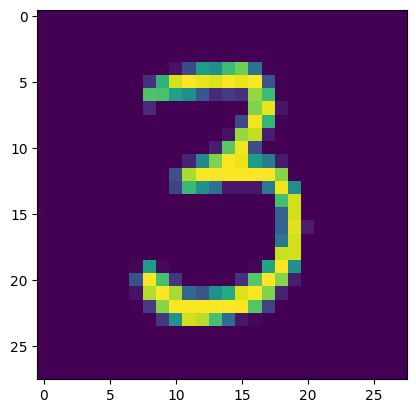

The value is: 3


In [7]:
plt.imshow(X_train[50])
plt.show()

#print the label
print("The value is:",y_train[50])

In [8]:
##Image label
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in y_train
print(np.unique(y_train))

print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#### We can use these labels as such or we can also apply One Hot Encoding

In [10]:
#scaling the values 
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building the Neural Network

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [13]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2914 - accuracy: 0.9159
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1331 - accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0804 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0495 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0380 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.034

## Traning accuracy = 98.9%

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0962 - accuracy: 0.9734
0.9733999967575073


#### Total data accuracy = 97.1%

In [16]:
print(X_test.shape)

(10000, 28, 28)


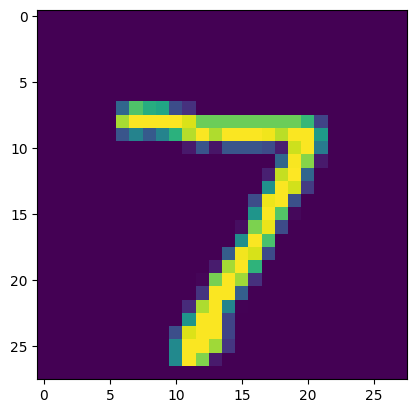

In [17]:
plt.imshow(X_test[0])

plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
print(y_pred[0])

[1.3732328e-01 5.0206261e-05 7.2706687e-01 8.6303121e-01 3.7778161e-10
 1.5800519e-02 3.2870608e-07 9.9999976e-01 3.8459885e-01 4.7570646e-01]


In [21]:
## converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)


7


In [22]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

| y_test = True labels
 y_pred_labels = predicted labels


### Confusin Matrix

In [23]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [24]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    3,    1,    0,    1,    4,    2,    2,    0],
       [   0, 1126,    4,    0,    0,    1,    3,    1,    0,    0],
       [   3,    1, 1005,    2,    5,    0,    4,    7,    5,    0],
       [   0,    2,    8,  955,    1,   19,    1,    7,    6,   11],
       [   0,    0,    1,    0,  954,    2,   10,    2,    1,   12],
       [   2,    0,    0,    2,    2,  874,    2,    1,    5,    4],
       [   3,    2,    2,    1,    1,    5,  942,    0,    2,    0],
       [   1,    4,   13,    1,    1,    0,    1,  996,    4,    7],
       [   5,    0,    4,    3,    3,   12,    1,    4,  940,    2],
       [   1,    2,    0,    3,   10,    5,    0,    5,    8,  975]])>

Text(0.5, 47.7222222222222, 'Predicted Lables')

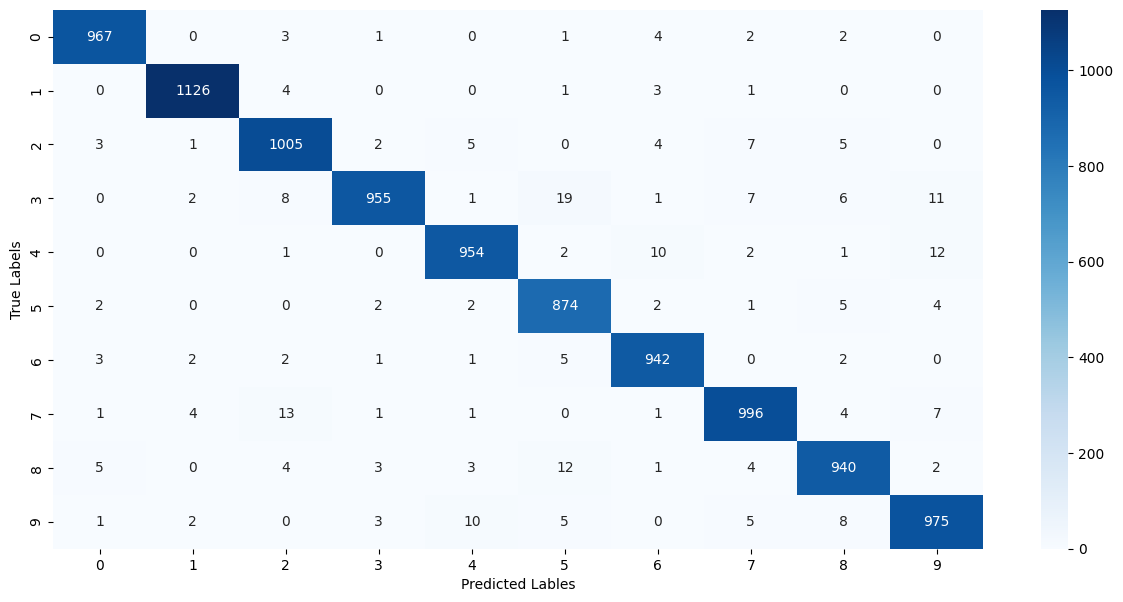

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Lables')

# Building a Predictive System

In [26]:
input_image_path = "D:\OFFICIAL\Journey of Coding Life\Deep Learning\Study Time\MNIST Digit Orediction\MNIST_digit.png"

input_image = cv2.imread(input_image_path)


In [27]:
type(input_image)

numpy.ndarray

In [28]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [29]:
# cv2.imshow('image', input_image)

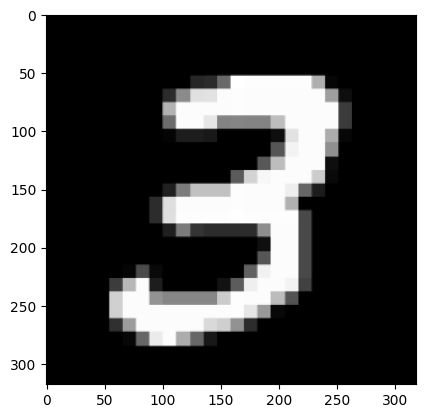

In [31]:
plt.imshow(input_image)

In [32]:
input_image.shape

(318, 318, 3)

In [34]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(318, 318)

In [36]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [37]:
input_image_resize.shape

(28, 28)

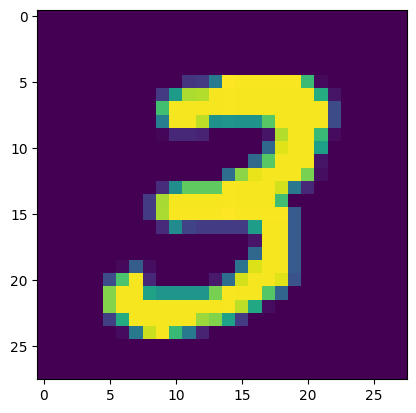

In [39]:
plt.imshow(input_image_resize)

In [40]:
input_image_resize = input_image_resize/255

In [41]:
type(input_image_resize)

numpy.ndarray

In [42]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [43]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 65ms/step
[[1.3208661e-08 6.8059620e-05 1.6977979e-04 1.0000000e+00 4.4116560e-13
  5.1189424e-03 1.9898292e-16 4.8548635e-04 9.8243885e-02 9.5480353e-01]]


In [44]:
input_pred_label = np.argmax(input_prediction)

In [45]:
print(input_pred_label)

3


# --- Predictive System ---

1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognised as  3


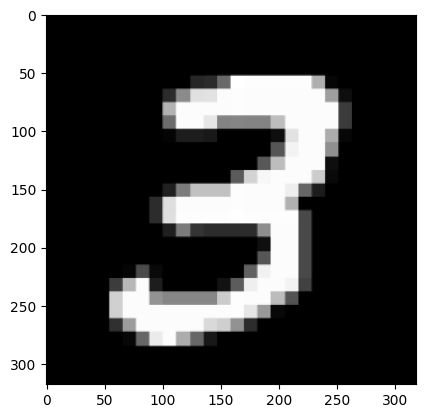

In [48]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
plt.imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)